In [2]:
import pandas as pd
import re

In [32]:
# compute how many cases / controls for Dr. Massion
case_cnt = []
control_cnt = []

df_fh = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_FHcohort.csv')
df_fh = df_fh.query('withimg_0330 == 1')
fh_control = df_fh.loc[df_fh['Pathologic_type'] == 'control']
fh_case = df_fh.loc[df_fh['Cancer_stage'] == df_fh['Cancer_stage']]
print (len(df_fh), len(fh_case), len(fh_control))
case_cnt += fh_case['MCL_ID'].tolist()
control_cnt += fh_control['MCL_ID'].tolist()


df_LCS = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_LCS_L3.csv')
df_LCS = df_LCS.query('withimg_0330 == 1')
LCS_control = df_LCS.loc[df_LCS['Cancer_bengin'] == 'N']
LCS_case = df_LCS.loc[df_LCS['Cancer_bengin'] == 'Y']
print (len(df_LCS), len(LCS_case), len(LCS_control))
case_cnt += LCS_case['MCL_ID'].tolist()
control_cnt += LCS_control['MCL_ID'].tolist()

df_LCS = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_LCS_L4.csv')
df_LCS = df_LCS.query('withimg_0330 == 1')
LCS_control = df_LCS.loc[df_LCS['Cancer_bengin'] == 'N']
LCS_case = df_LCS.loc[df_LCS['Cancer_bengin'] == 'Y']
print (len(df_LCS), len(LCS_case), len(LCS_control), len(LCS_case), len(LCS_control))
case_cnt += LCS_case['MCL_ID'].tolist()
control_cnt += LCS_control['MCL_ID'].tolist()

df_LCS = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/IPN_biomarker-MK_nopassword.csv')
df_LCS = df_LCS.query('withimg0601 == 1')
df_LCS = df_LCS.loc[df_LCS['true_Instit'] == 'UPMC']
LCS_control = df_LCS.loc[df_LCS['1Cancer0Benign'] == 0]
LCS_case = df_LCS.loc[df_LCS['1Cancer0Benign'] == 1]
print (len(df_LCS), len(LCS_case), len(LCS_control), len(set(LCS_case['MCL_ID'].tolist())), len(set(LCS_control['MCL_ID'].tolist())))
case_cnt += LCS_case['MCL_ID'].tolist()
control_cnt += LCS_control['MCL_ID'].tolist()

df_UPMC = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0421/Report_part1_nodup.csv')
df_UPMC = df_UPMC.query('withimg_0330 == 1')
UPMC_control = df_UPMC.loc[df_UPMC['cancer_bengin'] == 0]
UPMC_case = df_UPMC.loc[df_UPMC['cancer_bengin'] == 1]
print (len(df_UPMC), len(UPMC_case), len(UPMC_control), len(set(UPMC_case['MCL_ID'].tolist())), len(set(UPMC_control['MCL_ID'].tolist())))
case_cnt += UPMC_case['MCL_ID'].tolist()
control_cnt += UPMC_control['MCL_ID'].tolist()
case_cnt = [str(i).replace('.0', '') for i in case_cnt]
control_cnt = [str(i).replace('.0', '') for i in control_cnt]


print (len(case_cnt), len(control_cnt), len(set(case_cnt)), len(set(control_cnt) - set(case_cnt)))
print (len(set(case_cnt) & set(control_cnt)))

143 63 80
29 0 29
38 4 34 4 34
157 80 77 80 77
1867 1037 688 654 372
1184 908 801 520
72


{'38044078771', '9824474782', '16520735281', '8573381504', '18746979971', '32728214157', '31607690567', '35320827473', '25687847382', '36306257842', '25887216577', '17752302019', '24838040149', '27303766931', '39024124505', '37861465545', '4220667892', '15181188722', '21478588132', '31008457529', '36752402193', '30009657087', '29117939345', '38741004316', '39990999874', '21504053031', '21540537963', '38531508218', '29569544379', '363532318', '37790468547', '2802539456', '13458343657', '37812629812', '25895024572', '28985090258', '39874448768', '22810671621', '20900455161', '24562351903', '29008368572', '27846791934', '39664945958', '20802811825', '40282950834', '2838940357', '25630730985', '9892420837', '34057756732', '37899354051', '42484678149', '19947248085', '20631816246', '4405551943', '15492308577', '28745709521', '25892702246', '39473940230', '9250997899', '7668546444', '1096426121', '20136090249', '34804918004', '36943197337', '32770786807', '37678145435', '8974639241', '404398

# the UPMC cohort 08162018 doesn't with MCL ID
questions need to ask: what is the cancer / nodule, cooper / CT Data, RUL stuaff?

## the FH cohort 1
questions: the last items about nodule description.  Mf cancer center == LCS, FH wstong

Questions: Age is the current age or study begin's age?  blood draw time. 



what is LCS? which hosptial?

What is the Nodule Size?

Why I can not find nodule size in Jasper? Does all the information from Jasper?

How to use the mapping MCL ID with local ID?

In [59]:
# combine multiple external datasets: LCS L3 L4
data_item = ['Own_ID', 'MCL_ID', 'Date_of_birth','Age', 'Gender', 'Race', 'Education', 'CT_date', 'Lung_RADS', 'Nodule_size', 
             'Last_known_date', 'Cancer_benign', 'Diagnosis_date', 'Source', 'Height(inch)', 'Weight(kg)', 
            'Nodule_Location', 'Nodule_Location', 'Nodule_density', 'Nodule_calcification', 'Pathologic_type', 
            'T_stage', 'N_stage', 'M_stage', 'Cancer_stage', 'Tumor_Grade', 'Live_status', 'Ethnicity',
            'Smok_status', 'PackYear', 'Quit_time', 'Person_cancer_history', 'Family_lung_cancer', "Asthma", "COPD"]

info_dict = pd.DataFrame()
# for frame in data_item:
#     info_dict[frame] = []

df0_3 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/LCS_L3_L4.xlsx', sheet_name = 'L4')
df0_3_1 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/LCS_L3_L4.xlsx', sheet_name = 'add_L4')


for i, item in df0_3.iterrows():
    info_dict['Own_ID'] = df0_3['Sequence ID'].tolist()
    info_dict['MCL_ID'] = df0_3['MCL ID'].tolist()
    info_dict['Date_of_birth'] = df0_3_1['DOB'].tolist()
    info_dict['Scan_Age'] =  df0_3_1['Age_at_L4_Diagnosis'].tolist()
    info_dict['Current_Age'] = df0_3_1['CURRENT_AGE'].tolist()
    info_dict['StudyBegin_Age'] = len(df0_3) * ['']
    info_dict['Gender'] = df0_3['Gender'].tolist()
    info_dict['Race'] = df0_3['Race'].tolist()
    info_dict['CT_date'] = df0_3['Date of L4 CT'].tolist()
    info_dict['Lung_RADS'] = df0_3['Lung RADS at L4'].tolist()
    info_dict['Nodule_size'] = df0_3['Nodule Size'].tolist()
    info_dict['Last_known_date'] = df0_3['Date of Last Imaging'].tolist()
    info_dict['Cancer_bengin'] = df0_3['Cancer Cases'].tolist()
    info_dict['Diagnosis_date'] = len(df0_3) * ['']
    info_dict['Source'] =  len(df0_3) * ['LCS_L4']
    info_dict['Height(inch)'] = len(df0_3) * ['']
    info_dict['Weight(kg)'] = len(df0_3) * ['']
    info_dict['Nodule_Location'] = len(df0_3) * ['']
    info_dict['Nodule_density'] = len(df0_3) * ['']
    info_dict['Nodule_calcification'] = len(df0_3) * ['']
    info_dict['Pathologic_type'] = len(df0_3) * ['']
    info_dict['T_stage'] = len(df0_3) * ['']
    info_dict['N_stage'] = len(df0_3) * ['']
    info_dict['M_stage'] = len(df0_3) * ['']
    info_dict['Cancer_stage'] = len(df0_3) * ['']
    info_dict['Tumor_Grade'] = len(df0_3) * ['']
    info_dict['Live_status'] = len(df0_3) * ['']
    info_dict['Ethnicity'] = len(df0_3) * ['']
    info_dict['Smok_status'] = len(df0_3) * ['']
    info_dict['PackYear'] = df0_3_1['Pack Years'].tolist()
    info_dict['Quit_time'] = df0_3_1['Quit_Time'].tolist()
    info_dict['Person_cancer_history'] = df0_3_1['Cancer (y/n)'].tolist()
    info_dict['Family_lung_cancer'] = len(df0_3) * ['']
    info_dict["Asthma"] = df0_3_1['Asthma (y/n)'].tolist()
    info_dict["COPD"] = df0_3_1['COPD (y/n)'].tolist()
    
info_dict.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_LCS_L4.csv', index = False)



In [61]:
# combine multiple external datasets: FH cohort
data_item = ['Own_ID', 'MCL_ID', 'Date_of_birth','Age', 'Gender', 'Race', 'Education', 'CT_date', 'Lung_RADS', 'Nodule_size', 
             'Last_known_date', 'Cancer_benign', 'Diagnosis_date', 'Source', 'Height(inch)', 'Weight(kg)', 
            'Nodule_Location', 'Nodule_Location', 'Nodule_density', 'Nodule_calcification', 'Pathologic_type', 
            'T_stage', 'N_stage', 'M_stage', 'Cancer_stage', 'Tumor_Grade', 'Live_status', 'Ethnicity',
            'Smok_status', 'PackYear', 'Quit_time', 'Person_cancer_history', 'Family_lung_cancer', "Asthma", "COPD"]

info_dict = pd.DataFrame()
# for frame in data_item:
#     info_dict[frame] = []

df0_3 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/FH cohort 1 clinical and imaging info to VB_2020JAN8.xlsx')
#df0_3_1 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/LCS_L3_L4.xlsx', sheet_name = 'add_L4')


#for i, item in df0_3.iterrows():
info_dict['Own_ID'] = df0_3['Repository ID'].tolist()
info_dict['MCL_ID'] = df0_3['MCL_ID'].tolist()
info_dict['Date_of_birth'] = len(df0_3) * ['']
info_dict['Scan_Age'] =  df0_3['age at time of blood draw'].tolist()
info_dict['Current_Age'] = df0_3['age at time of blood draw'].tolist()
info_dict['StudyBegin_Age'] = len(df0_3) * ['']
info_dict['Gender'] = df0_3['gender'].tolist()
info_dict['Race'] = df0_3['race'].tolist()
info_dict['CT_date'] = len(df0_3) * ['']
info_dict['Lung_RADS'] = len(df0_3) * ['']
d_x, d_y, d_z = df0_3['dimensions(X,mm)'].tolist(), df0_3['dimensions(Y,mm)'].tolist(),df0_3['dimensions(Z,mm)'].tolist()
info_dict['Nodule_size'] = [[d_x[i], d_y[i], d_z[i]] for i in range(len(d_x))]
info_dict['Last_known_date'] = len(df0_3) * ['']
info_dict['Cancer_bengin'] = len(df0_3) * ['']
info_dict['Diagnosis_date'] = len(df0_3) * ['']
info_dict['Source'] =  len(df0_3) * ['FH_cohort']
info_dict['Height(inch)'] = len(df0_3) * ['']
info_dict['Weight(kg)'] = len(df0_3) * ['']
info_dict['Nodule_Location'] = df0_3['Nodule Location'].tolist()
info_dict['Nodule_density'] = len(df0_3) * ['']
info_dict['Nodule_calcification'] = len(df0_3) * ['']
info_dict['Pathologic_type'] = df0_3['Lung Cancer Histology'].tolist()
info_dict['T_stage'] = len(df0_3) * ['']
info_dict['N_stage'] = len(df0_3) * ['']
info_dict['M_stage'] = len(df0_3) * ['']
info_dict['Cancer_stage'] = df0_3['Lung Cancer Staging'].tolist()
info_dict['Tumor_Grade'] = len(df0_3) * ['']
info_dict['Live_status'] = len(df0_3) * ['']
info_dict['Ethnicity'] = df0_3['ethnicity'].tolist()
info_dict['Smok_status'] = df0_3['smokin status'].tolist()
info_dict['PackYear'] = df0_3['pack years'].tolist()
info_dict['Quit_time'] = len(df0_3) * ['']
info_dict['Person_cancer_history'] = df0_3['Prior Cancer History'].tolist()
info_dict['Family_lung_cancer'] = df0_3['Family history of lung cancer'].tolist()
info_dict["Asthma"] = len(df0_3) * ['']
info_dict["COPD"] = len(df0_3) * ['']
    
info_dict.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_FHcohort.csv', index = False)

In [70]:
# combine multiple external datasets: Stanford 
data_item = ['Own_ID', 'MCL_ID', 'Date_of_birth','Age', 'Gender', 'Race', 'Education', 'CT_date', 'Lung_RADS', 'Nodule_size', 
             'Last_known_date', 'Cancer_benign', 'Diagnosis_date', 'Source', 'Height(inch)', 'Weight(kg)', 
            'Nodule_Location', 'Nodule_Location', 'Nodule_density', 'Nodule_calcification', 'Pathologic_type', 
            'T_stage', 'N_stage', 'M_stage', 'Cancer_stage', 'Tumor_Grade', 'Live_status', 'Ethnicity',
            'Smok_status', 'PackYear', 'Quit_time', 'Person_cancer_history', 'Family_lung_cancer', "Asthma", "COPD"]

info_dict = pd.DataFrame()
# for frame in data_item:
#     info_dict[frame] = []

df0_3 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/StanfordMCLImages_SamplesDec2017.xlsx', sheet_name = 'MCLDataToVandy')
#df0_3_1 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/LCS_L3_L4.xlsx', sheet_name = 'add_L4')


#for i, item in df0_3.iterrows():
info_dict['Own_ID'] = df0_3['Study ID'].tolist()
info_dict['MCL_ID'] = df0_3['MCL ID'].tolist()
info_dict['Date_of_birth'] = len(df0_3) * ['']
info_dict['Scan_Age'] =  df0_3['Age'].tolist()
info_dict['Current_Age'] = df0_3['Age'].tolist()
info_dict['StudyBegin_Age'] = len(df0_3) * ['']
info_dict['Gender'] = df0_3['Gender'].tolist()
info_dict['Race'] = len(df0_3) * ['']
info_dict['CT_date'] = len(df0_3) * ['']
info_dict['Lung_RADS'] = len(df0_3) * ['']

info_dict['Nodule_size'] = df0_3['pTumor Size'].tolist()
info_dict['Last_known_date'] = len(df0_3) * ['']
info_dict['Cancer_bengin'] = df0_3['Final diagnosis'].tolist()
info_dict['Diagnosis_date'] = len(df0_3) * ['']
info_dict['Source'] =  len(df0_3) * ['Stanford']
info_dict['Height(inch)'] = len(df0_3) * ['']
info_dict['Weight(kg)'] = len(df0_3) * ['']
info_dict['Nodule_Location'] = df0_3['Nodule Location'].tolist()
info_dict['Nodule_density'] = df0_3['Nodule Density'].tolist()
info_dict['Nodule_calcification'] = df0_3['Nodule Calcifications?'].tolist()
info_dict['Pathologic_type'] = df0_3['Pathologic diagnosis'].tolist()
info_dict['T_stage'] = df0_3['TNM stage'].tolist()
info_dict['N_stage'] = df0_3['TNM stage'].tolist()
info_dict['M_stage'] = df0_3['TNM stage'].tolist()
info_dict['Cancer_stage'] = df0_3['Stage'].tolist()
info_dict['Tumor_Grade'] = df0_3['Tumor Grade'].tolist()
info_dict['Live_status'] = len(df0_3) * ['']
info_dict['Ethnicity'] = df0_3['Ethnicity'].tolist()
info_dict['Smok_status'] = df0_3['Smoking history'].tolist()
Years_smok, Packs_day = df0_3['Years Smoked'].tolist(), df0_3['Packs Per Day'].tolist()
packyear = []
for i in range(len(df0_3)):
    try:
        packyear.append(Years_smok[i] * Packs_day[i])
    except:
        packyear.append('')
info_dict['PackYear'] = packyear
info_dict['Quit_time'] = df0_3['Years Quit'].tolist()
info_dict['Person_cancer_history'] = df0_3['Cancer history'].tolist()
info_dict['Family_lung_cancer'] = len(df0_3) * ['']
info_dict["Asthma"] = len(df0_3) * ['']
info_dict["COPD"] = len(df0_3) * ['']
    
info_dict.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_stanford.csv', index = False)



In [76]:
# combine multiple external datasets: UPMC 
data_item = ['Own_ID', 'MCL_ID', 'Date_of_birth','Age', 'Gender', 'Race', 'Education', 'CT_date', 'Lung_RADS', 'Nodule_size', 
             'Last_known_date', 'Cancer_benign', 'Diagnosis_date', 'Source', 'Height(inch)', 'Weight(kg)', 
            'Nodule_Location', 'Nodule_Location', 'Nodule_density', 'Nodule_calcification', 'Pathologic_type', 
            'T_stage', 'N_stage', 'M_stage', 'Cancer_stage', 'Tumor_Grade', 'Live_status', 'Ethnicity',
            'Smok_status', 'PackYear', 'Quit_time', 'Person_cancer_history', 'Family_lung_cancer', "Asthma", "COPD"]

info_dict = pd.DataFrame()
# for frame in data_item:
#     info_dict[frame] = []


df0_3_1 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/UPMCcohortinfo08162018 (002).xlsx', sheet_name = 'Sheet2')
local_mcl = {}

for i, item in df0_3.iterrows():
    local_mcl[item['PatientName']] = item['PatientID']

mclid = []

for i, item in df0_3_1.iterrows():
    mclid.append(local_mcl[item['PID']])
    
df0_3_1['MCL_ID'] = mclid

df0_3_1.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/UPMCcohort.csv', index = False)

df0_3 = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/UPMCcohort.csv')


#for i, item in df0_3.iterrows():
info_dict['Own_ID'] = df0_3['PID'].tolist()
info_dict['MCL_ID'] = df0_3['MCL_ID'].tolist()
info_dict['Date_of_birth'] = df0_3['DOB'].tolist() #len(df0_3) * ['']
info_dict['Scan_Age'] =  len(df0_3) * ['']
info_dict['Current_Age'] = df0_3['Age'].tolist()
info_dict['StudyBegin_Age'] = len(df0_3) * ['']
info_dict['Gender'] = df0_3['Sex'].tolist()
info_dict['Race'] = len(df0_3) * ['']
info_dict['CT_date'] = df0_3['Cooper/CT Date'].tolist() #len(df0_3) * ['']
info_dict['Lung_RADS'] = len(df0_3) * ['']

info_dict['Nodule_size'] = len(df0_3) * ['']
info_dict['Last_known_date'] = len(df0_3) * ['']
info_dict['Cancer_bengin'] = df0_3['Cancer/Nodule'].tolist()
info_dict['Diagnosis_date'] = len(df0_3) * ['']
info_dict['Source'] =  len(df0_3) * ['UPMC']

info_dict['Height(inch)'] = len(df0_3) * ['']
info_dict['Weight(kg)'] = len(df0_3) * ['']
info_dict['Nodule_Location'] = len(df0_3) * ['']
info_dict['Nodule_density'] = df0_3['Solidity'].tolist()
info_dict['Nodule_calcification'] = len(df0_3) * ['']
info_dict['Pathologic_type'] = len(df0_3) * ['']
info_dict['T_stage'] = len(df0_3) * ['']
info_dict['N_stage'] = len(df0_3) * ['']
info_dict['M_stage'] = len(df0_3) * ['']
info_dict['Cancer_stage'] = len(df0_3) * ['']
info_dict['Tumor_Grade'] = len(df0_3) * ['']
info_dict['Live_status'] = len(df0_3) * ['']
info_dict['Ethnicity'] = len(df0_3) * ['']
info_dict['Smok_status'] = df0_3['Smoking'].tolist()

info_dict['PackYear'] = df0_3['Pack-years'].tolist()
info_dict['Quit_time'] = len(df0_3) * ['']
info_dict['Person_cancer_history'] = len(df0_3) * ['']
info_dict['Family_lung_cancer'] = len(df0_3) * ['']
info_dict["Asthma"] = len(df0_3) * ['']
info_dict["COPD"] = len(df0_3) * ['']
    
info_dict.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_UPMC.csv', index = False)



In [149]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Riqiang_3_30_2020_16_52_58.csv')
subj_list = df['Subject'].tolist()
subj_list = [re.split('[-_.]', str(i))[0] for i in subj_list]
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_stanford.csv')

withimg_0330 = []
withimg_sub = []

for i, item in df.iterrows():
    if str(item['MCL_ID']).replace('.0', '') in subj_list:
        withimg_0330.append(1)
        withimg_sub.append(item['MCL_ID'])
    else:
        withimg_0330.append(0)
print (sum(withimg_0330), len(set(withimg_sub)))
path_list = df['Cancer_bengin'].tolist()
cnt = 0
for path in path_list:
    if path == 'Malignant':
        cnt += 1
print (cnt)
#print (sum(df['Pathologic_type'].tolist() == 'control'))
#df['withimg_0330'] = withimg_0330
#df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/standard_LCS_L3.csv', index = False)

0 0
132


# Document of other sites rather than VUMC and VA


# The following are designed for VUMC and VA



In [3]:
import numpy as np
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_ori.csv')
Pid_list = np.array(df['Patient ID'].tolist())
nll_index = np.where(Pid_list == 'Patient ID')
print (nll_index[0])
new_df = df.drop(nll_index[0])
new_df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_ori.csv', index = False)

[    13     36     58 ... 195133 195145 195157]


In [196]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
mcllist = df['MCL_ID'].tolist()
mcllist = [str(i).replace('.0', '') for i in mcllist]
print (len(set(mcllist)))
f = open('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/MRN_in_Jasper_dict.txt')
lines = f.readlines()[1:]
lines = [re.split('[ \t]', i.strip()) for i in lines]
MRN_MCL = {}
#print (len(set(list(lines))))
for i in range(len(lines)):
    if '0' <= lines[i][0][0] and '9'>= lines[i][0][0]:
        assert len(line) == 2
        MRN_MCL[lines[i][0]] = lines[i][1]
print (len(MRN_MCL.values())) 

7712
7712


In [114]:
# add the MCL id to Jasper file
f = open('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/MRN_in_Jasper_dict.txt')
lines = f.readlines()[1:]
lines = [re.split('[ \t]', i.strip()) for i in lines]
MRN_MCL = {}
for i in range(len(lines)):
    if '0' <= lines[i][0][0] and '9'>= lines[i][0][0]:
        assert len(line) == 2
        MRN_MCL[lines[i][0]] = lines[i][1]
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
mcl_list = []
MRN_MCL['nan'] = 'nan'
for i, item in df.iterrows():
    mrn = str(item['MRN']).replace('.0', '')
    if mrn not in MRN_MCL.keys():
        mcl_list.append('')
        print (mrn)
    else:
        mcl_list.append(MRN_MCL[mrn])
df['MCL_ID'] = mcl_list
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv', index = False)


In [119]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
cancer_set = ['Sarcoma', 'Adenoid Cystic Carcinoma', 'Squamous Cell Carcinoma', 'Squamous Metaplasia', 'Adenosquamous Carcinoma', 'Small Cell Carcinoma', 'Adenocarcinoma', 'Large Cell Neuroendocrine', 'Large Cell Carcinoma', 'Bronchioalveolar Carcinoma', 'Carcinoid', 'Moderate Dysplasia', 'Atypical Carcinoid', 'Non Small Cell (NSCLC)', 'Carcinoma In Situ']
nocancer_set = ['Negative for Malignant Cells', 'Normal', 'Negative for Dysplasia and Metaplasia', 'Granuloma ', 'Granuloma' , 'Mild Dysplasia']
null_set = ['nan', 'Other', 'No Diagnosis', 'Unsatisfactory']
cancer_bengin = []
for i, item in df.iterrows():
    
    if item['Histologic Type'] !=  item['Histologic Type'] or item['Histologic Type'] in null_set:
        cancer_bengin.append('')
    elif item['Histologic Type'] in cancer_set:
        cancer_bengin.append(1)
    elif item['Histologic Type'] in nocancer_set:
        cancer_bengin.append(0)
df['cancer_bengin'] = cancer_bengin
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv', index = False)

In [113]:
diag_type = df['Histologic Type'].tolist()
print (set(diag_type))

{nan, 'Sarcoma', 'Unsatisfactory', 'Adenoid Cystic Carcinoma', 'Squamous Cell Carcinoma', 'Squamous Metaplasia', 'Adenosquamous Carcinoma', 'Small Cell Carcinoma', 'Adenocarcinoma', 'Granuloma ', 'Negative for Malignant Cells', 'No Diagnosis', 'Large Cell Neuroendocrine', 'Large Cell Carcinoma', 'Normal', 'Bronchioalveolar Carcinoma', 'Carcinoid', 'Negative for Dysplasia and Metaplasia', 'Moderate Dysplasia', 'Other', 'Atypical Carcinoid', 'Non Small Cell (NSCLC)', 'Carcinoma In Situ', 'Mild Dysplasia'}


# Cancer Dictionary

cancer_set = ['Sarcoma', 'Adenoid Cystic Carcinoma', 'Squamous Cell Carcinoma', 'Squamous Metaplasia', 'Adenosquamous Carcinoma', 'Small Cell Carcinoma', 'Adenocarcinoma', 'Large Cell Neuroendocrine', 'Large Cell Carcinoma', 'Bronchioalveolar Carcinoma', 'Carcinoid', 'Moderate Dysplasia', 'Atypical Carcinoid', 'Non Small Cell (NSCLC)', 'Carcinoma In Situ']

nocancer_set = ['Negative for Malignant Cells', 'Normal', 'Negative for Dysplasia and Metaplasia', 'Granuloma ', 'Granuloma' , 'Mild Dysplasia']

null_set [nan, 'Other', 'No Diagnosis', 'Unsatisfactory']

In [121]:
# compute with image 

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Riqiang_3_30_2020_16_52_58.csv')
subj_list = df['Subject'].tolist()
subj_list = [re.split('[-_.]', str(i))[0] for i in subj_list]
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')

withimg_0330 = []
withimg_sub = []

for i, item in df.iterrows():
    if str(item['MCL_ID']).replace('.0', '') in subj_list:
        withimg_0330.append(1)
        withimg_sub.append(item['MCL_ID'])
    else:
        withimg_0330.append(0)
print (sum(withimg_0330), len(set(withimg_sub)))
df['withimg_0330'] = withimg_0330
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv', index = False)

/home/local/VANDERBILT/gaor2/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


130701 996


In [9]:
# compute how many subject with label in VUMC and VA
#
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Riqiang_3_30_2020_16_52_58.csv')

subj_list = df['Subject'].tolist()
subj_list = [re.split('[-_.]', str(i))[0] for i in subj_list]
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
img_pos = []
img_neg = []
for i, item in df.iterrows():
    if item['withimg_0330'] == 1 and item['cancer_bengin'] == 1:
        img_pos.append(item['MCL_ID'])
    elif item['withimg_0330'] == 1 and item['cancer_bengin'] == 0:
        img_neg.append(item['MCL_ID'])
img_pos = [str(i).replace('.0', '') for i in img_pos]
img_neg = [str(i).replace('.0', '') for i in img_neg]
print (len(set(img_pos)), len(set(img_neg)), len(set(img_neg) & set(img_pos)))
print (len(set(img_pos)) + len(set(img_neg)) - len(set(img_neg) & set(img_pos)))

653 371 70
954


In [202]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
df = df.query('withimg_0330 == 1')
print (len(set(df['MCL_ID'].tolist())))

996


In [198]:
# compute how many with-diagnosis, how many with-image
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
df = df.query('cancer_bengin == cancer_bengin')
MCL_diag = {}
for i, item in df.iterrows():
    mcl_id = str(item['MCL_ID']).replace('.0', '')
    if mcl_id in MCL_diag.keys():
        MCL_diag[mcl_id] = max(MCL_diag[mcl_id], item['cancer_bengin'] )
    else:
        MCL_diag[mcl_id] = item['cancer_bengin'] 
print (sum(MCL_diag.values()))
mcllist = df['MCL_ID'].tolist()
mcllist = [str(i).replace('.0', '') for i in mcllist]
print (len(set(mcllist)))
#print (df['MCL_ID'].tolist())

4545.0
5668


In [282]:
# compute different factors in VUMC , the ratio of missing, ignore with diagnosis or not
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')  
#df = df.query('cancer_bengin == cancer_bengin') 
fact = 'Date of Birth'
factors = ['Gender', 'Date of Birth', 'Race', 'Education', 'Exposure (Y/N)', 'DRUGALCOHOL_Q1','CIGARETTE_Q1', 'Prior Cancer', 'Histological Grade', 'Path Staging', 'Lung RADS', 'CT Nodule Number', 'Chest CT Location',"CT Scan Location", "CT Nodule Shape", 'CT Nodule Density', 'CT Nodule Calcified', 'Age Quit', 
          "Pack Years", 'BMI', 'Chest CT Size', 'Smoking Duration']
for fact in factors: 
    print (fact)
    MCL_factor = {}
    for i, item in df.iterrows():
        MCL_ID = str(item['MCL_ID']).replace('.0', '')
        if MCL_ID not in MCL_factor.keys():
            MCL_factor[MCL_ID] = item[fact] 
        elif MCL_factor[MCL_ID] != MCL_factor[MCL_ID]:
            MCL_factor[MCL_ID] = item[fact]
    cnt = 0        
    for value in MCL_factor.values():
        if value != value:
            cnt += 1
    print (len(MCL_factor.values()), cnt)


Gender
7712 186
Date of Birth
7712 224
Race
7712 149
Education
7712 4626
Exposure (Y/N)
7712 5297
DRUGALCOHOL_Q1
7712 4808
CIGARETTE_Q1
7712 2320
Prior Cancer
7712 3473
Histological Grade
7712 6112
Path Staging
7712 4681
Lung RADS
7712 7244
CT Nodule Number
7712 7363
Chest CT Location
7712 5073
CT Scan Location
7712 7205
CT Nodule Shape
7712 7471
CT Nodule Density
7712 7455
CT Nodule Calcified
7712 7459
Age Quit
7712 5871
Pack Years
7712 4189
BMI
7712 5048
Chest CT Size
7712 5144
Smoking Duration
7712 5008


In [283]:
# compute different factors in VUMC , the ratio of missing, with diagnosis
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
df = df.query('cancer_bengin == cancer_bengin')
fact = 'Date of Birth'
factors = ['Gender', 'Date of Birth', 'Race', 'Education', 'Exposure (Y/N)', 'DRUGALCOHOL_Q1','CIGARETTE_Q1', 'Prior Cancer', 'Histological Grade', 'Path Staging', 'Lung RADS', 'CT Nodule Number', 'Chest CT Location',"CT Scan Location", "CT Nodule Shape", 'CT Nodule Density', 'CT Nodule Calcified', 'Age Quit', 
          "Pack Years", 'BMI', 'Chest CT Size', 'Smoking Duration']
for fact in factors: 
    print (fact)
    MCL_factor = {}
    for i, item in df.iterrows():
        MCL_ID = str(item['MCL_ID']).replace('.0', '')
        if MCL_ID not in MCL_factor.keys():
            MCL_factor[MCL_ID] = item[fact] 
        elif MCL_factor[MCL_ID] != MCL_factor[MCL_ID]:
            MCL_factor[MCL_ID] = item[fact]
    cnt = 0        
    for value in MCL_factor.values():
        if value != value:
            cnt += 1
    print (len(MCL_factor.values()), cnt)

Gender
5668 4
Date of Birth
5668 13
Race
5668 4
Education
5668 2969
Exposure (Y/N)
5668 3552
DRUGALCOHOL_Q1
5668 3175
CIGARETTE_Q1
5668 1312
Prior Cancer
5668 1995
Histological Grade
5668 4092
Path Staging
5668 2905
Lung RADS
5668 5263
CT Nodule Number
5668 5363
Chest CT Location
5668 3258
CT Scan Location
5668 5229
CT Nodule Shape
5668 5452
CT Nodule Density
5668 5439
CT Nodule Calcified
5668 5436
Age Quit
5668 4038
Pack Years
5668 2778
BMI
5668 3300
Chest CT Size
5668 3332
Smoking Duration
5668 3312


In [284]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv') # a different way of computing
df = df.query('cancer_bengin == cancer_bengin')
fact = 'Date of Birth'
factors = ['Gender', 'Date of Birth', 'Race', 'Education', 'Exposure (Y/N)', 'DRUGALCOHOL_Q1','CIGARETTE_Q1', 'Prior Cancer', 'Histological Grade', 'Path Staging', 'Lung RADS', 'CT Nodule Number', 'Chest CT Location',"CT Scan Location", "CT Nodule Shape", 'CT Nodule Density', 'CT Nodule Calcified', 'Age Quit', 
          "Pack Years", 'BMI', 'Chest CT Size', 'Smoking Duration']
for fact in factors: 
    print (fact)
    MCL_factor = {}
    for i, item in df.iterrows():
        MCL_ID = str(item['MCL_ID']).replace('.0', '')
        if MCL_ID not in MCL_factor.keys():
            MCL_factor[MCL_ID] = []
        MCL_factor[MCL_ID].append(item[fact])
    #     elif MCL_factor[item['MCL_ID']] != MCL_factor[item['MCL_ID']]:  # which means the value in current dict is None. 
    #         MCL_factor[item['MCL_ID']] = item[fact]
    cnt = 0        
    for key in MCL_factor.keys():
        tmp_list = MCL_factor[key]
        for val in tmp_list:
            if val == val:
                cnt += 1
                break
    print (len(MCL_factor.keys()), cnt)

Gender
5668 5664
Date of Birth
5668 5655
Race
5668 5664
Education
5668 2699
Exposure (Y/N)
5668 2116
DRUGALCOHOL_Q1
5668 2493
CIGARETTE_Q1
5668 4356
Prior Cancer
5668 3673
Histological Grade
5668 1576
Path Staging
5668 2763
Lung RADS
5668 405
CT Nodule Number
5668 305
Chest CT Location
5668 2410
CT Scan Location
5668 439
CT Nodule Shape
5668 216
CT Nodule Density
5668 229
CT Nodule Calcified
5668 232
Age Quit
5668 1630
Pack Years
5668 2890
BMI
5668 2368
Chest CT Size
5668 2336
Smoking Duration
5668 2356


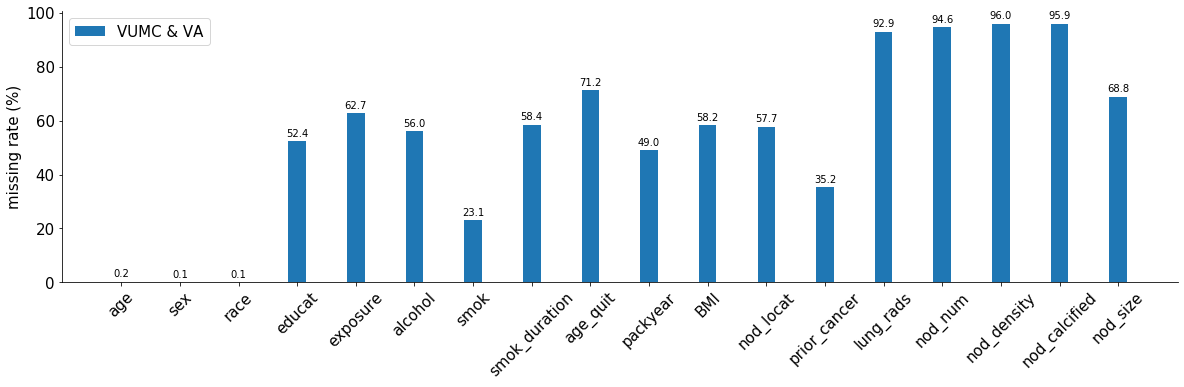

In [6]:
import matplotlib.pyplot as plt

labels = ['age',  'sex', 'race', 'educat', 'exposure', 'alcohol', 'smok', 
          'smok_duration', 'age_quit', 'packyear', 'BMI', 'nod_locat', 'prior_cancer',
         "lung_rads", 'nod_num', 'nod_density', 'nod_calcified', 'nod_size']

weight = [13./ 5668, 4 / 5668, 4 / 5668, 2969 / 5668, 3552 / 5668, 3175 / 5668, 1312 / 5668, 
         3312 / 5668, 4038 / 5668, 2778 / 5668, 3300 / 5668, 3258 / 5668, 1995/ 5668,
         5263 / 5668, 5363 / 5668, 5439 / 5668, 5436 / 5668, 3332 / 5668]

weight = [round(a, 3) * int(100) for a in weight]
weight = [0.2, 0.1, 0.1, 52.4, 62.7, 56.0, 23.1, 58.4, 71.2, 49.0, 58.2, 57.7, 35.2, 92.9, 94.6, 96.0, 95.9, 68.8]

# labels = ['age',  'sex', 'race', 'educat', 'exposure', 'alcohol', 'smok', 
#           'smok_duration', 'age_quit', 'packyear', 'BMI', 'nod_locat', 'prior_cancer',
#          "lung_rads", 'nod_num', 'nod_density', 'nod_calcified', 'nod_size']
# weight = [ 1584 / 7260, 5/ 7260,  4/ 7260,  3231/ 7260, 3940 / 7260,  3435 / 7260, 1318 / 7260,
#          3495/ 7260, 4622 / 7260, 2920 / 7260, 3735 / 7260, 4362 / 7260, 2008 / 7260, 
#          6340 / 7260, 6458 / 7260, 6534 / 7260, 6603/ 7260, 4517 / 7260]

# weight = [round(a, 3) * int(100) for a in weight]
# weight = [21.8, 0.1, 0.1, 44.5, 54.3, 47.3, 18.2, 48.1, 63.7, 40.2, 51.4, 60.1, 27.7, 87.3, 89.0, 90.0, 91.0, 62.2]

x = range(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (20, 5))
rects1 = ax.bar(x , weight, width, label='VUMC & VA')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('missing rate (%)', fontsize = 15)
#ax.set_title('The importance of factors when caculating the risk')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 15)
#plt.xticks(rotation = 45)
ax.set_xticklabels(labels, fontsize = 15)
ax.legend(fontsize = 15)
plt.show()

fig.savefig('/nfs/masi/gaor2/tmp/mcl_statics.pdf')

In [5]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/Riqiang_3_30_2020_16_52_58.csv')
exl = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/MCL IDs VUMC and VA_2020MAR30.xlsx')

In [9]:
xnat_subj = df['Subject'].tolist()
xnat_subj = [re.split('[-_]', sub)[0] for sub in xnat_subj]
jsb_subj = exl['Record ID'].tolist()
jsb_subj = [str(i) for i in jsb_subj]
print (len(set(xnat_subj) & set(jsb_subj)))
print (len(set(xnat_subj)))

1280
2008


In [13]:
dfo = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/session_20200128_meta.csv')
dfo_subj = dfo['subj'].tolist()
dfo_subj = [str(i) for i in dfo_subj]
print (len(set(xnat_subj) & set(jsb_subj) | set(dfo_subj)))

1399


In [19]:
df1 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0330/StanfordMCLImages_SamplesDec2017.xlsx', sheet_name = 'MCLDataToVandy')
df1_subj = df1['MCL ID'].tolist()
df1_subj = [str(i) for i in df1_subj]
print  (len(set(xnat_subj) & (set(jsb_subj) | set(dfo_subj) | set(df1_subj))))
print (set(df1_subj))

1397
{'37705606090', '9269317534', '16321094374', '40000551254', '33494930190', '29252047421', '14353288512', '24103574419', '40296660526', '11142623596', '36743207869', '7576945226', '37896113133', '21124035202', '40286112996', '24526226734', '21180275611', '12615924095', '12915836287', '26884746607', '25198490124', '33289008849', '13100183451', '39307863317', '38501919132', '36226158933', '20721370476', '21782659439', '2272908264', '28776780831', '15487096924', '27360254716', '37994656375', '26814650241', '4552920381', '6390730743', '22595414198', '1354325455', '9008552026', '6609577891', '21506180848', '8462394171', '13012437519', '18679306337', '26145614624', '309774966', '36401825054', '18976837088', '4646682065', '12768543144', '71276068', '34647028710', '28613799132', '21898400466', '11109287727', '25637760146', '22381930029', '39173248532', '15543389018', '14747672742', '11880215644', '38265395206', '42890980035', '19395022617', '33454009884', '15230793877', '16202781524', '380

# the following for divide different study in MCL

In [225]:
# remove the not-good row

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol2.csv')
Pid_list = np.array(df['Patient ID'].tolist())
nll_index = np.where(Pid_list == 'Patient ID')
print (len(nll_index[0]))
new_df = df.drop(nll_index[0])
new_df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol2.csv', index = False)

/home/local/VANDERBILT/gaor2/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0


In [227]:
# this is the correct way to comput the subject number
#df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv') # this output 7712
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol2.csv')
#print (set(df['MRN'].tolist()))
l = [str(i).replace('.0', '') for i in set(df['MRN'].tolist())]
print (len(set(l)))
cnt = 0
for i in set(l):
    #print (i)
    if i[0] >='0' and i[0] <='9':
        cnt += 1
print (cnt)

4031
4014


In [234]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol.csv')
protocol_name, correlative = [], []
for i, item in df.iterrows():
    protocol_name.append(re.split(':', item['Protocol Name'])[0])
print (set(df['Correlative Protocol'].tolist()))
print (set(protocol_name))

{nan, 'VICCTHO0547', 'VICCTHO1078', 'VICCTHO0373', 'VICCTHO1524', 'VICCTHO0734', 'VICCTHO0398', 'VICCTHO0136', 'VICCTHO1730', ' controls', 'VICCTHO0938', 'VICCTHO0879', 'VICCTHO1496'}
{'VICC THO 0380', 'VICC THO 0055', 'VICC THO 0398', 'THO 0640 Translational Science in Chemo-Naive Pts w/Stage IIIb or IV NSCLC treated w/the EGFR-TKI, Erlotinib', 'VICCTHO1078 Nashville Early Diagnosis Lung Cancer Project', 'VICC THO 0316', 'VCC THO 0054', 'VICC THO 1524', 'VICC THO 0136', 'VCC THO 0059', 'VICC THO 0879 Airway Epithelium Gene Expression in the Diagnosis of Lung Cancer ', 'VICC THO 0730', 'VICC THO0938 Survey and Blood Sample Collection for Patients with Lung Cancer Who Never Smoked Cigarettes', 'VICC THO 0547', 'VICC THO 0376', 'VICC THO 0267', 'VICC THO 0332', 'VICC THO 0734 - Molecular Predictors of lung cancer behavior', 'VICC THO 03104', 'VCC THO 0102', 'VICC THO 1496'}


In [238]:
# normalize the protocol name in protocol file

change_dict = {'VICC THO 0380': 'VICCTHO0380', 'VICC THO 0055': 'VICCTHO0055', 'VICC THO 0398': 'VICCTHO0398', 
               'THO 0640 Translational Science in Chemo-Naive Pts w/Stage IIIb or IV NSCLC treated w/the EGFR-TKI, Erlotinib': 'VICCTHO0640', 
              'VICCTHO1078 Nashville Early Diagnosis Lung Cancer Project': 'VICCTH01078',
              'VICC THO 0316': 'VICCTHO0316', 'VCC THO 0054': 'VICCTHO0054', 'VICC THO 1524': 'VICCTHO1524', 
              'VICC THO 0136': 'VICCTHO0136', 'VCC THO 0059': 'VCCTHO0059', 
               'VICC THO 0879 Airway Epithelium Gene Expression in the Diagnosis of Lung Cancer ': 'VICCTHO0879', 
              'VICC THO 0730': 'VICCTHO0730', 
               'VICC THO0938 Survey and Blood Sample Collection for Patients with Lung Cancer Who Never Smoked Cigarettes': 'VICCTHO0938',
              'VICC THO 0547': 'VICCTHO0547', 'VICC THO 0376': 'VICCTHO0376', 'VICC THO 0267': 'VICCTHO0267', 
              'VICC THO 0332': 'VICCTHO0332', 'VICC THO 0734 - Molecular Predictors of lung cancer behavior': 'VICCTHO0734', 
              'VICC THO 03104': 'VICCTHO3104', 'VCC THO 0102': 'VICCTHO0102', 'VICC THO 1496': 'VICCTHO1496'}

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol.csv')
Norm_protocol_name = []
for i, item in df.iterrows():
    Norm_protocol_name.append(change_dict[re.split(':', item['Protocol Name'])[0]])
df['norm_protocol_name'] = Norm_protocol_name
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol.csv', index = False)


In [ ]:
#VICCTH01078, VCCTHO0059 correct this typo

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol.csv')
corr_list, norm_list = [], []
for i, item in df.iterrows():
    #if item['Correlative Protocol'] == 'VICCTH01078':
    corr_list.append(str(item['Correlative Protocol']).replace('VICCTH01078', 'VICCTHO1078').replace('VCCTHO0059', 'VICCTHO0059'))
    norm_list.append(str(item['norm_protocol_name']).replace('VICCTH01078', 'VICCTHO1078').replace('VCCTHO0059', 'VICCTHO0059'))
df['Correlative Protocol'] = corr_list
df['norm_protocol_name'] = norm_list
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_proto_notypo.csv', index = False)

In [267]:
# add the protocol name to Report_need2.csv
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_proto_notypo.csv')
correlative_proto = {}
norm_proto = {}
for i, item in df.iterrows():
    correlative_proto[item['Patient ID']]  = item['Correlative Protocol']
    norm_proto[item['Patient ID']]  = item['norm_protocol_name']
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
correlative_p, norm_p = [], []
for i, item in df.iterrows():
    if item['Patient ID'] in norm_proto.keys():
        correlative_p.append(correlative_proto[item['Patient ID']])
        norm_p.append(norm_proto[item['Patient ID']])
    else:
        correlative_p.append('')
        norm_p.append('')
df['correlative_proto'] = correlative_p
df['norm_proto'] = norm_p
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv', index = False)

In [269]:
len(set(correlative_p) | set(norm_p)) 

26

In [272]:
# set(correlative_p) | set(norm_p) = {'',' controls','VICCTHO0059','VICCTHO1078','VICCTHO0054','VICCTHO0055','VICCTHO0102',
#                                     'VICCTHO0136','VICCTHO0267','VICCTHO0316','VICCTHO0332','VICCTHO0373','VICCTHO0376',
#                                     'VICCTHO0380','VICCTHO0398','VICCTHO0547','VICCTHO0640','VICCTHO0730','VICCTHO0734',
#                                     'VICCTHO0879','VICCTHO0938','VICCTHO1078','VICCTHO1496','VICCTHO1524','VICCTHO1730',
#                                     'VICCTHO3104',nan}
comp_set = {' controls','VICCTHO0059','VICCTHO1078','VICCTHO0054','VICCTHO0055','VICCTHO0102',
                                    'VICCTHO0136','VICCTHO0267','VICCTHO0316','VICCTHO0332','VICCTHO0373','VICCTHO0376',
                                    'VICCTHO0380','VICCTHO0398','VICCTHO0547','VICCTHO0640','VICCTHO0730','VICCTHO0734',
                                    'VICCTHO0879','VICCTHO0938','VICCTHO1496','VICCTHO1524','VICCTHO1730',
                                    'VICCTHO3104'}
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
total_cnt, img_cnt, diag_cnt, imgdiag_cnt = 0,0,0,0
for set_name in comp_set:
    tmp_df = df.loc[(df['correlative_proto'] == set_name) | (df['norm_proto'] == set_name)]
    tmp_df_withimg = tmp_df.loc[tmp_df['withimg_0330'] == 1]
    tmp_df_withdiag = tmp_df.query('cancer_bengin == cancer_bengin')
    tmp_df_withimgdiag = tmp_df_withimg.query('cancer_bengin == cancer_bengin')
    
    print (set_name, len(set(tmp_df['MCL_ID'].tolist())), len(set(tmp_df_withimg['MCL_ID'].tolist())), 
           len(set(tmp_df_withdiag['MCL_ID'].tolist())), len(set(tmp_df_withimgdiag['MCL_ID'].tolist())))
    total_cnt += len(set(tmp_df['MCL_ID'].tolist()))
    img_cnt += len(set(tmp_df_withimg['MCL_ID'].tolist()))
    diag_cnt += len(set(tmp_df_withdiag['MCL_ID'].tolist()))
    imgdiag_cnt += len(set(tmp_df_withimgdiag['MCL_ID'].tolist()))
print (total_cnt, img_cnt, diag_cnt, imgdiag_cnt)

VICCTHO1078 1052 182 917 177
VICCTHO0059 18 0 18 0
VICCTHO0398 3032 514 2547 489
 controls 30 0 24 0
VICCTHO0730 32 0 11 0
VICCTHO3104 3 0 3 0
VICCTHO0376 135 0 20 0
VICCTHO0373 308 19 305 19
VICCTHO0734 30 0 24 0
VICCTHO0136 1416 398 1343 393
VICCTHO0055 21 0 21 0
VICCTHO0102 11 0 11 0
VICCTHO0332 655 24 330 23
VICCTHO0547 221 23 189 23
VICCTHO1524 20 8 16 8
VICCTHO1730 2 1 2 1
VICCTHO0938 89 0 49 0
VICCTHO0879 29 11 27 11
VICCTHO1496 30 11 7 4
VICCTHO0380 43 2 41 2
VICCTHO0316 3 0 3 0
VICCTHO0640 41 3 30 3
VICCTHO0267 25 1 14 1
VICCTHO0054 38 0 37 0
7284 1197 5989 1154


In [7]:
comp_set = {' controls','VICCTHO0059','VICCTHO1078','VICCTHO0054','VICCTHO0055','VICCTHO0102',
                                    'VICCTHO0136','VICCTHO0267','VICCTHO0316','VICCTHO0332','VICCTHO0373','VICCTHO0376',
                                    'VICCTHO0380','VICCTHO0398','VICCTHO0547','VICCTHO0640','VICCTHO0730','VICCTHO0734',
                                    'VICCTHO0879','VICCTHO0938','VICCTHO1496','VICCTHO1524','VICCTHO1730',
                                    'VICCTHO3104'}
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
total_cnt, img_cnt, diag_cnt, imgdiag_cnt = 0,0,0,0
for set_name in comp_set:
    tmp_df = df.loc[(df['correlative_proto'] == set_name) | (df['norm_proto'] == set_name)]
    tmp_df_withimg = tmp_df.loc[tmp_df['withimg_0330'] == 1]
    tmp_df_withdiag = tmp_df.query('cancer_bengin == cancer_bengin')
    tmp_df_withimgdiag = tmp_df_withimg.query('cancer_bengin == cancer_bengin')
    MCL_ID = [str(i).replace('.0', '') for i in tmp_df['MCL_ID'].tolist()]
    MCL_withimg = [str(i).replace('.0', '') for i in tmp_df_withimg['MCL_ID'].tolist()]
    MCL_withdiag = [str(i).replace('.0', '') for i in tmp_df_withdiag['MCL_ID'].tolist()]
    MCL_withimgdiag = [str(i).replace('.0', '') for i in tmp_df_withimgdiag['MCL_ID'].tolist()]
    print (set_name, len(set(MCL_ID)), len(set(MCL_withimg)), 
           len(set(MCL_withdiag)), len(set(MCL_withimgdiag)))
    total_cnt += len(set(MCL_ID))
    img_cnt += len(set(MCL_withimg))
    diag_cnt += len(set(MCL_withdiag))
    imgdiag_cnt += len(set(MCL_withimgdiag))
print (total_cnt, img_cnt, diag_cnt, imgdiag_cnt)

/home/local/VANDERBILT/gaor2/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


VICCTHO0055 21 0 21 0
VICCTHO0373 175 19 172 19
VICCTHO0547 190 23 159 23
VICCTHO0938 88 0 48 0
VICCTHO0376 56 0 13 0
VICCTHO0640 41 3 30 3
VICCTHO0730 32 0 11 0
VICCTHO0054 38 0 37 0
VICCTHO1496 30 11 7 4
VICCTHO0267 25 1 14 1
VICCTHO0879 29 11 27 11
VICCTHO0059 18 0 18 0
VICCTHO1524 20 8 16 8
VICCTHO1078 393 182 354 177
VICCTHO3104 3 0 3 0
VICCTHO0136 1354 398 1282 393
VICCTHO0316 3 0 3 0
VICCTHO0398 2022 514 1725 489
VICCTHO0332 310 24 201 23
 controls 30 0 24 0
VICCTHO0380 43 2 41 2
VICCTHO0734 30 0 24 0
VICCTHO1730 2 1 2 1
VICCTHO0102 11 0 11 0
4964 1197 4243 1154


In [12]:
# correct the protocol combine problem. Because multiple rows of same patient may in different studies. 

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol.csv')
in0398, in1730, in0136, in1078 = [], [], [],[]
for i, item in df.iterrows():
    
    if '0398' in str(item['Protocol Name']) or '0398' in str(item['Correlative Protocol']):
        in0398.append(1)
    else:
        in0398.append(0)
    
    if '1730' in str(item['Protocol Name']) or '1730' in str(item['Correlative Protocol']):
        in1730.append(1)
    else:
        in1730.append(0)
    
    if '0136' in str(item['Protocol Name']) or '0136' in str(item['Correlative Protocol']):
        in0136.append(1)
    else:
        in0136.append(0)
    
    if '1078' in str(item['Protocol Name']) or '1078' in str(item['Correlative Protocol']):
        in1078.append(1)
    else:
        in1078.append(0)
        
df['in0398'] = in0398
df['in1730'] = in1730
df['in0136'] = in0136
df['in1078'] = in1078

df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol.csv', index = False)

In [16]:
# add the protocol name to Report_need2.csv
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol.csv')
pid_in0398 = {}
pid_in1730 = {}
pid_in0136 = {}
pid_in1078 = {}
for i, item in df.iterrows():
    if item['Patient ID'] not in pid_in0398.keys():
        pid_in0398[item['Patient ID']] = 0
    
    if item['Patient ID'] not in pid_in1730.keys():
        pid_in1730[item['Patient ID']] = 0
        
    if item['Patient ID'] not in pid_in0136.keys():
        pid_in0136[item['Patient ID']] = 0
    
    if item['Patient ID'] not in pid_in1078.keys():
        pid_in1078[item['Patient ID']] = 0
        
    pid_in0398[item['Patient ID']]  = max(item['in0398'], pid_in0398[item['Patient ID']])
    pid_in1730[item['Patient ID']]  = max(item['in1730'], pid_in1730[item['Patient ID']])
    pid_in0136[item['Patient ID']]  = max(item['in0136'], pid_in0136[item['Patient ID']])
    pid_in1078[item['Patient ID']]  = max(item['in1078'], pid_in1078[item['Patient ID']])
    
    
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
in0398, in1730, in0136, in1078 = [], [], [],[]

for i, item in df.iterrows():
    if item['Patient ID'] not in pid_in0398:
        in0398.append(0)
    else:
        in0398.append(pid_in0398[item['Patient ID']])
        
    if item['Patient ID'] not in pid_in1730:
        in1730.append(0)
    else:
        in1730.append(pid_in1730[item['Patient ID']])
        
    if item['Patient ID'] not in pid_in0136:
        in0136.append(0)
    else:
        in0136.append(pid_in0136[item['Patient ID']])
        
    if item['Patient ID'] not in pid_in1078:
        in1078.append(0)
    else:    
        in1078.append(pid_in1078[item['Patient ID']])
    
df['in0398'] = in0398
df['in1730'] = in1730
df['in0136'] = in0136
df['in1078'] = in1078

df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv', index = False)

In [88]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_nodup.csv')
#df = df.query('cancer_bengin == cancer_bengin')
df = df.loc[df['withimg_0330'] == 1]
df_0 = df.loc[(df['new_in0136'] == 1) | (df['new_in0398'] == 1)]
MCL_list = df_0['MCL_ID'].tolist()
MCL_list = [str(i).replace('.0', '') for i in MCL_list]
print (len(set(MCL_list)))

741


# update the protocol 20200420

In [67]:
df1 = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol1.csv')
df2 = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_protocol2.csv')
s0398_set, s1730_set, s0136_set, s1078_set = set(), set(), set(), set()
for i, item in df1.iterrows():
    if '0398' in str(item['Correlative Protocol']):
        s0398_set.add(item['Patient ID'])
    if '1730' in str(item['Correlative Protocol']):
        s1730_set.add(item['Patient ID'])
    if '0136' in str(item['Correlative Protocol']):
        s0136_set.add(item['Patient ID'])
    if '1078' in str(item['Correlative Protocol']):
        s1078_set.add(item['Patient ID'])
        
for i, item in df2.iterrows():
    if '0398' in str(item['Protocol Name']):
        s0398_set.add(item['Patient ID'])
    if '1730' in str(item['Protocol Name']):
        s1730_set.add(item['Patient ID'])
    if '0136' in str(item['Protocol Name']):
        s0136_set.add(item['Patient ID'])
    if '1078' in str(item['Protocol Name']):
        s1078_set.add(item['Patient ID'])

In [68]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
in0398, in1730, in0136, in1078 = [], [], [],[]

for i, item in df.iterrows():
    if item['Patient ID'] not in s0398_set:
        in0398.append(0)
    else:
        in0398.append(1)
        
    if item['Patient ID'] not in s1730_set:
        in1730.append(0)
    else:
        in1730.append(1)
        
    if item['Patient ID'] not in s0136_set:
        in0136.append(0)
    else:
        in0136.append(1)
        
    if item['Patient ID'] not in s1078_set:
        in1078.append(0)
    else:    
        in1078.append(1)
    
df['new_in0398'] = in0398
df['new_in1730'] = in1730
df['new_in0136'] = in0136
df['new_in1078'] = in1078

#df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv', index = False)

In [19]:
# find missed subject in 0330
import os
nifti_root = '/nfs/masi/MCL/nifti/combine'
nifti_list = os.listdir(nifti_root)
id_list = []
for subj in nifti_list:
    sess_list = os.listdir(nifti_root + '/' + subj)
    sess_list = [subj + 'time' + sess for sess in sess_list]
    id_list += sess_list
    
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Riqiang_3_30_2020_16_52_58.csv')
csvid_list = []
for i, item in df.iterrows():
    CTSESS = item['XNAT_CTSESSIONDATA ID'].replace('MCL_', '')
    tmp_list = re.split('[_-]', CTSESS)
    subj = tmp_list[0]
    if tmp_list[0] != tmp_list[1]:
        sess = tmp_list[1]
    else:
        sess = tmp_list[2]
    if len(sess) != 8 or "SPORE" in item['XNAT_CTSESSIONDATA ID']:
        continue
    if subj+ 'time' + sess not in id_list:
        csvid_list.append(item['XNAT_CTSESSIONDATA ID'])
f = open('/nfs/masi/MCL/file/txt/for_download/missedincsv_before0330.txt', 'w')   
for sess in csvid_list:
    f.write(sess + '\n')
f.close()
    
    

In [17]:
len(csvid_list)

467

In [18]:
csvid_list

['04098379052_04098379052-20100419',
 '10595310111-20100101',
 '1059730-20180212',
 '1064529844-20181212',
 '10708378885-20150610',
 '10713084141-20190722',
 '10716117056-20120412',
 '10716117056-20130814',
 '10716117056-20170421',
 '10782750438-20171117',
 '10817759785_20160922_072728_062',
 '10817759785_20170330_114950',
 '10817759785_20170414_082245',
 '10839399945_20190923_152057_593000',
 '1096426121-20190621',
 '11039021614_11039021614-20080729',
 '11039021614-20080729',
 '11362369936-20180423',
 '11378030101-20110527',
 '11563343910_11563343910-20030422',
 '11563343910-20030422',
 '11771580873_20191028_142635_091000',
 '12049146729_20081009_080810_138000',
 '12113686581-20150819',
 '1242987892-20180702',
 '1253337821-20160924',
 '12639867256-20160712',
 '12705088174_12705088174-20100319',
 '12849947462-20110613',
 '12982225437-20180205',
 '13080043572-20170802',
 '13108403999-20161007',
 '13394110385_19990102',
 '13394110385_20010102',
 '13429944367_13429944367-20101130',
 '1346